<a href="https://colab.research.google.com/github/bondpy202212/AI_projects/blob/main/2_Convolutional_Neural_Networks(CNN)_in_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# This is formatted as code
```

**Imports**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models

**Load the data**\
https://github.com/zalandoresearch/fashion-mnist

In [2]:
# Load the Fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


**Pre-processing the data**

In [3]:
def reshape_and_normalize(images, dimension):

    # Reshape the images to add an extra dimension
    images = images.reshape((dimension, 28, 28, 1))

    # Normalize pixel values
    images = images / 255.0


    return images

**Test function with the next cell:**

In [4]:
# Reload the images in case you run this cell multiple times
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

# Apply your function
training_images = reshape_and_normalize(training_images, 60000)
test_images = reshape_and_normalize(test_images, 10000)

print('Training images:')
print(f"Maximum pixel value after normalization: {np.max(training_images)}\n")
print(f"Shape of training set after reshaping: {training_images.shape}\n")
print(f"Shape of one image after reshaping: {training_images[0].shape}\n\n")

print('Testing images:')
print(f"Maximum pixel value after normalization: {np.max(test_images)}\n")
print(f"Shape of training set after reshaping: {test_images.shape}\n")
print(f"Shape of one image after reshaping: {test_images[0].shape}")

Training images:
Maximum pixel value after normalization: 1.0

Shape of training set after reshaping: (60000, 28, 28, 1)

Shape of one image after reshaping: (28, 28, 1)


Testing images:
Maximum pixel value after normalization: 1.0

Shape of training set after reshaping: (10000, 28, 28, 1)

Shape of one image after reshaping: (28, 28, 1)


**Defining callback**

In [5]:
class myCallback(tf.keras.callbacks.Callback):

    # Define the method that checks the accuracy at the end of each epoch
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.95):
            print("\nReached 95% accuracy so cancelling training!")
            self.model.stop_training = True

**Convolutional Model**

In [10]:
def convolutional_model():

    # Define the model
    model = tf.keras.models.Sequential([
        tf.keras.Input(shape=(28, 28, 1)),
        tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(352, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    # Print the model summary
    model.summary()


    return model

**Checking the size of the model**

In [11]:
# Save your untrained model
model = convolutional_model()

# Get number of weights
model_params = model.count_params()

# Unit test to limit the size of the model
assert model_params < 1000000, (
    f'Your model has {model_params:,} params. For successful grading, please keep it '
    f'under 1,000,000 by reducing the number of units in your Conv2D and/or Dense layers.'
                                )


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 11, 11, 16)          │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 5, 5, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 352)                 │         141,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           3,530 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 147,162 (574.85 KB)

 Trainable params: 147,162 (574.85 KB)

 Non-trainable params: 0 (0.00 B)

**Train model**

In [12]:
# Instantiate the callback class
callbacks = myCallback()

print(f'\nMODEL TRAINING:')

# Train your model
history = model.fit(training_images, training_labels, epochs=15, callbacks=[callbacks])


MODEL TRAINING:
Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 18ms/step - accuracy: 0.7570 - loss: 0.6659
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 19ms/step - accuracy: 0.8722 - loss: 0.3444
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 19ms/step - accuracy: 0.8913 - loss: 0.2883
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 19ms/step - accuracy: 0.9032 - loss: 0.2572
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9132 - loss: 0.2305
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.9207 - loss: 0.2085
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 18ms/step - accuracy: 0.9265 - loss: 0.1958
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9303 - loss: 0.1831
Epoch 9/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.9378 - loss: 0.1641
Epoch 10/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.9439 - loss: 0.1505
Epoch 11/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 18ms/step - accuracy: 0.9472 - loss

**MODEL EVALUATION**

In [13]:
print(f'\nMODEL EVALUATION')

test_loss = model.evaluate(test_images, test_labels)


MODEL EVALUATION
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9013 - loss: 0.3145


**Visualizing the Convolutions and Pooling**

In [14]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


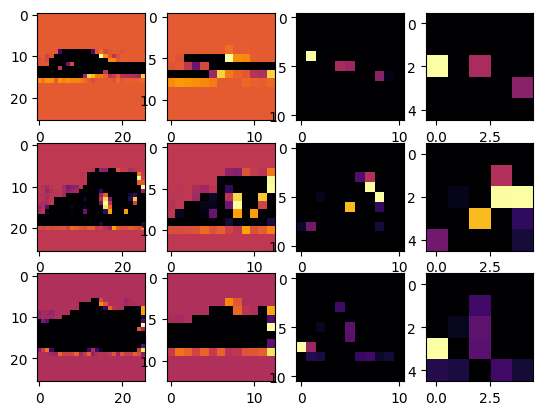

In [16]:
f, axarr = plt.subplots(3, 4)

# 5	Sandal
FIRST_IMAGE=8
SECOND_IMAGE=11
THIRD_IMAGE=21

CONVOLUTION_NUMBER = 1

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs=model.layers[0].input, outputs=layer_outputs)


for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)

  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)

  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)